In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('All.csv')
dataset.shape

(36707, 80)

In [2]:

dataset.loc[dataset["URL_Type_obf_Type"] =='Defacement', "URL_Type_obf_Type"] = 1
dataset.loc[dataset["URL_Type_obf_Type"] =='benign', "URL_Type_obf_Type"] = 0
dataset.loc[dataset["URL_Type_obf_Type"] =='phishing', "URL_Type_obf_Type"] = 2
dataset.loc[dataset["URL_Type_obf_Type"] =='malware', "URL_Type_obf_Type"] = 3
dataset.loc[dataset["URL_Type_obf_Type"] =='spam', "URL_Type_obf_Type"] = 4
dataset = pd.DataFrame(dataset)


dataset.dropna(inplace = True)
print(dataset.shape)

(18982, 80)


In [3]:
X = dataset.iloc[:, 0:79].values
y = dataset.iloc[:, 79].values
y=y.astype('int')

In [4]:
from sklearn.model_selection import train_test_split
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:

def PCA_components(X_train ,X_test ,n_components):
    pca = PCA(n_components)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    regressor = RandomForestRegressor(n_estimators=30, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred =np.round(y_pred,0)
    return accuracy_score(y_test, y_pred)

In [7]:
t=[]
for i in range(1,10):
    t.append(PCA_components(X_train ,X_test ,i/10))
    print(PCA_components(X_train ,X_test ,i/10))

0.5541216750065842
0.5541216750065842
0.7440084277060838
0.7440084277060838
0.8111667105609692
0.8643666052146431
0.8870160653147221
0.8883328943903082
0.9015011851461681


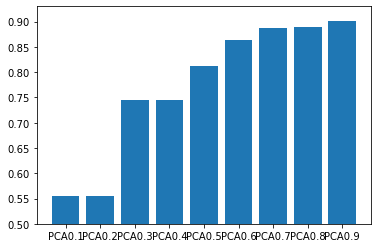

In [8]:
from matplotlib import pyplot as plt 
x =['PCA0.1','PCA0.2','PCA0.3','PCA0.4','PCA0.5','PCA0.6','PCA0.7','PCA0.8',
    'PCA0.9']
y = [t[0],t[1],t[2],t[3],t[4],t[5],t[6],t[7],t[8]]
plt.ylim(0.5, 0.93)
plt.bar(x,y)
plt.show()

In [ ]:
s=[]
for i in range(10,70,10):
    s.append(PCA_components(X_train ,X_test ,i))
    print(PCA_components(X_train ,X_test ,i))
    

0.8904398209112457
0.8988675269949961
0.9065051356333947
0.9117724519357387


In [ ]:
PCA_components(X_train ,X_test ,10)

In [ ]:
s79 = PCA_components(X_train ,X_test ,79)
print(s79)

In [ ]:
from matplotlib import pyplot as plt 
x =['PCA10','PCA20','PCA30','PCA40','PCA50','PCA60','PCA79']
y = [s[0],s[1],s[2],s[3],s[4],s[5],s79]
plt.ylim(0.88, 0.93)
plt.bar(x,y)
plt.show()

In [ ]:
X = dataset.iloc[:, 0:79].values
y = dataset.iloc[:, 79].values
y=y.astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size=0.2, random_state=0)

In [ ]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)   


In [ ]:
regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [ ]:
y_pred =np.round(y_pred,0)
score1= accuracy_score(y_test, y_pred)
print(score1)


In [ ]:
from matplotlib import pyplot as plt 
x =['PCA10','PCA20','PCA30','PCA40','PCA50','PCA60','PCA79','NoPCA']
y = [s[0],s[1],s[2],s[3],s[4],s[5],s79,score1]
plt.ylim(0.88, 0.94)
plt.bar(x,y)
plt.show()

conclusion: generally with more features, the accuracy will be higher

odd thing: even with PCA(79) all features, the accuracy is lower.
